# Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Проверим датасет на сбалансированность классов.

In [4]:
df[['sex']].value_counts(normalize=True).round(decimals=3)

sex   
male      0.549
female    0.451
dtype: float64

In [5]:
for i in df:
    print(df[i].unique())

[736041664 532037425 435962603 ...  88361042 900065925 711404576]
['A Jesus Garcia' 'A Lam Shin' 'Aaron Brown' ... 'di Xiao'
 'le Quoc Toan Tran' 'le Roux Hamman']
['ESP' 'KOR' 'CAN' 'MDA' 'NZL' 'AUS' 'USA' 'ETH' 'BRN' 'IOA' 'GBR' 'UZB'
 'RSA' 'EGY' 'MAR' 'QAT' 'SUD' 'ALG' 'DEN' 'NED' 'DJI' 'SEN' 'CMR' 'ITA'
 'NIG' 'SWE' 'GHA' 'AFG' 'AZE' 'KSA' 'BAN' 'NGR' 'RUS' 'IND' 'HUN' 'KAZ'
 'BDI' 'ERI' 'POL' 'BRA' 'GEO' 'CZE' 'SEY' 'GAM' 'LTU' 'IRI' 'ROU' 'CUB'
 'SLO' 'BAH' 'ARG' 'PUR' 'FRA' 'RWA' 'TOG' 'MDV' 'TUN' 'ISR' 'LAT' 'JOR'
 'MAS' 'LIB' 'LBA' 'PLE' 'IRQ' 'TUR' 'VEN' 'JPN' 'TPE' 'KGZ' 'CHN' 'MEX'
 'GRE' 'IRL' 'JAM' 'SUI' 'BAR' 'HON' 'ANG' 'GER' 'COL' 'URU' 'MNE' 'SRB'
 'BUL' 'FIN' 'UKR' 'BLR' 'SMR' 'COK' 'SAM' 'AUT' 'BEL' 'KEN' 'SVK' 'POR'
 'ECU' 'UAE' 'NAM' 'GUY' 'EST' 'SKN' 'ARU' 'PAN' 'PER' 'TAN' 'FIJ' 'GUI'
 'NOR' 'ARM' 'THA' 'SIN' 'TKM' 'CRO' 'BIH' 'TGA' 'MAW' 'DOM' 'GUA' 'MKD'
 'TJK' 'CYP' 'CHI' 'MLT' 'ZIM' 'TTO' 'CRC' 'BOL' 'BUR' 'ISL' 'HAI' 'ROT'
 'MGL' 'MAD' 'GAB' 'SRI' 'LAO' 'M

Решим, нужна ли нам колонка национальность, и сильно ли национальность влияет на пол спортсмена.

In [6]:
countries = df['nationality'].unique()
countries

array(['ESP', 'KOR', 'CAN', 'MDA', 'NZL', 'AUS', 'USA', 'ETH', 'BRN',
       'IOA', 'GBR', 'UZB', 'RSA', 'EGY', 'MAR', 'QAT', 'SUD', 'ALG',
       'DEN', 'NED', 'DJI', 'SEN', 'CMR', 'ITA', 'NIG', 'SWE', 'GHA',
       'AFG', 'AZE', 'KSA', 'BAN', 'NGR', 'RUS', 'IND', 'HUN', 'KAZ',
       'BDI', 'ERI', 'POL', 'BRA', 'GEO', 'CZE', 'SEY', 'GAM', 'LTU',
       'IRI', 'ROU', 'CUB', 'SLO', 'BAH', 'ARG', 'PUR', 'FRA', 'RWA',
       'TOG', 'MDV', 'TUN', 'ISR', 'LAT', 'JOR', 'MAS', 'LIB', 'LBA',
       'PLE', 'IRQ', 'TUR', 'VEN', 'JPN', 'TPE', 'KGZ', 'CHN', 'MEX',
       'GRE', 'IRL', 'JAM', 'SUI', 'BAR', 'HON', 'ANG', 'GER', 'COL',
       'URU', 'MNE', 'SRB', 'BUL', 'FIN', 'UKR', 'BLR', 'SMR', 'COK',
       'SAM', 'AUT', 'BEL', 'KEN', 'SVK', 'POR', 'ECU', 'UAE', 'NAM',
       'GUY', 'EST', 'SKN', 'ARU', 'PAN', 'PER', 'TAN', 'FIJ', 'GUI',
       'NOR', 'ARM', 'THA', 'SIN', 'TKM', 'CRO', 'BIH', 'TGA', 'MAW',
       'DOM', 'GUA', 'MKD', 'TJK', 'CYP', 'CHI', 'MLT', 'ZIM', 'TTO',
       'CRC', 'BOL',

In [7]:
for i in countries:
    print(i)
    print(df[(df['nationality'] == i)][['sex']].value_counts(normalize=True).round(decimals=3))
    print()

ESP
sex   
male      0.534
female    0.466
dtype: float64

KOR
sex   
male      0.502
female    0.498
dtype: float64

CAN
sex   
female    0.595
male      0.405
dtype: float64

MDA
sex   
male      0.609
female    0.391
dtype: float64

NZL
sex   
female    0.505
male      0.495
dtype: float64

AUS
sex   
female    0.51
male      0.49
dtype: float64

USA
sex   
female    0.534
male      0.466
dtype: float64

ETH
sex   
female    0.526
male      0.474
dtype: float64

BRN
sex   
male      0.588
female    0.412
dtype: float64

IOA
sex   
male      0.889
female    0.111
dtype: float64

GBR
sex   
male      0.548
female    0.452
dtype: float64

UZB
sex   
male      0.671
female    0.329
dtype: float64

RSA
sex   
male      0.664
female    0.336
dtype: float64

EGY
sex   
male      0.697
female    0.303
dtype: float64

MAR
sex   
male      0.612
female    0.388
dtype: float64

QAT
sex   
male      0.949
female    0.051
dtype: float64

SUD
sex   
male      0.667
female    0.333
dtype: float64


Видим, что в некоторых странах спортсменов женского пола значительно меньше, чем в других, поэтому позже преобразуем колонку.

Удалим неинформативные данные, а также данные о количестве медалей, так как они не помогут в задаче бинарной классификации пола спортсмена, в чем можно убедиться по корреляции. 

In [8]:
df = pd.get_dummies(df, columns = ['sex'], drop_first = True)

<AxesSubplot:>

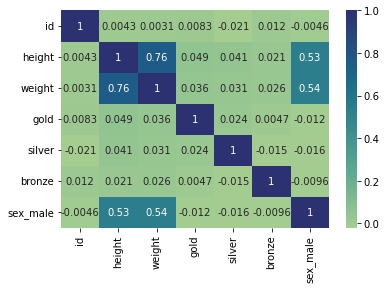

In [9]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot = True, cmap="crest")

In [10]:
df = df.drop(['id', 'name', 'gold', 'silver', 'bronze'], axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nationality  11538 non-null  object 
 1   dob          11537 non-null  object 
 2   height       11208 non-null  float64
 3   weight       10879 non-null  float64
 4   sport        11538 non-null  object 
 5   sex_male     11538 non-null  uint8  
dtypes: float64(2), object(3), uint8(1)
memory usage: 462.1+ KB


Займемся обработкой данных для даты рождения. Для начала удалим строку, где дата рождения отсутствует. 

In [12]:
df = df.drop(df[df['dob'].isnull()].index, axis = 0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11537
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nationality  11537 non-null  object 
 1   dob          11537 non-null  object 
 2   height       11208 non-null  float64
 3   weight       10879 non-null  float64
 4   sport        11537 non-null  object 
 5   sex_male     11537 non-null  uint8  
dtypes: float64(2), object(3), uint8(1)
memory usage: 552.1+ KB


Получим из даты рождения возраст спортсмена.

In [14]:
from datetime import datetime, date

In [15]:
def get_year(date):
    date = datetime.strptime(date,'%m/%d/%y').strftime('%d/%m/%Y')
    return date
df['DOB'] = df['dob'].apply(get_year)

In [16]:
def age(born):
    born = datetime.strptime(born, '%d/%m/%Y').date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df['age'] = df['DOB'].apply(age)

In [17]:
df['age'].unique()

array([ 53,  36,  30,  32,  33,  29,  31,  34,  25,  26,  24,  28, -40,
        27,  35,  37, -41,  42,  22,  40,  38,  39,  44,  51,  41,  43,
        47,  23,  21,  52,  46,  45,  50,  20, -43, -46,  48, -45, -39,
       -42,  49,  54, -44, -37, -33, -32, -35, -38, -36], dtype=int64)

In [18]:
df[df['age']<0]

,nationality,dob,height,weight,sport,sex_male,DOB,age
32,MAR,7/15/62,1.74,67.0,equestrian,1,15/07/2062,-40
55,IOA,8/21/63,1.83,84.0,shooting,1,21/08/2063,-41
1376,ESP,3/11/66,1.76,58.0,equestrian,0,11/03/2066,-43
1446,MEX,6/8/68,1.58,55.0,equestrian,0,08/06/2068,-46
1746,GBR,6/29/67,1.82,86.0,equestrian,1,29/06/2067,-45
...,...,...,...,...,...,...,...,...
10679,UKR,8/9/67,1.90,86.0,equestrian,1,09/08/2067,-45
10954,AUS,4/7/62,1.77,73.0,shooting,1,07/04/2062,-40
11056,LUX,7/4/63,1.57,58.0,table tennis,0,04/07/2063,-41
11432,DOM,9/8/67,1.83,64.0,equestrian,0,08/09/2067,-45


In [19]:
df['age'] = df['age'].apply(lambda x: x+100 if x<0 else x)

In [20]:
df.head()

,nationality,dob,height,weight,sport,sex_male,DOB,age
0,ESP,10/17/69,1.72,64.0,athletics,1,17/10/1969,53
1,KOR,9/23/86,1.68,56.0,fencing,0,23/09/1986,36
2,CAN,5/27/92,1.98,79.0,athletics,1,27/05/1992,30
3,MDA,1/2/91,1.83,80.0,taekwondo,1,02/01/1991,32
4,NZL,11/26/90,1.81,71.0,cycling,1,26/11/1990,32


In [21]:
df['age'].unique()

array([53, 36, 30, 32, 33, 29, 31, 34, 25, 26, 24, 28, 60, 27, 35, 37, 59,
       42, 22, 40, 38, 39, 44, 51, 41, 43, 47, 23, 21, 52, 46, 45, 50, 20,
       57, 54, 48, 55, 61, 58, 49, 56, 63, 67, 68, 65, 62, 64],
      dtype=int64)

In [22]:
df = df.drop(['dob', 'DOB'], axis = 1)

In [23]:
df.head()

,nationality,height,weight,sport,sex_male,age
0,ESP,1.72,64.0,athletics,1,53
1,KOR,1.68,56.0,fencing,0,36
2,CAN,1.98,79.0,athletics,1,30
3,MDA,1.83,80.0,taekwondo,1,32
4,NZL,1.81,71.0,cycling,1,32


Заполним пустые значения для категорий "height" и "weight". Cначала для роста, так как пропущенных значений меньше.

In [24]:
df = pd.get_dummies(df, columns = ['nationality', 'sport'], drop_first = True)

In [25]:
lr = df.copy()

In [26]:
lr = lr.drop('weight', axis = 1)

In [27]:
test = lr[lr['height'].isnull()].copy()
test.head()

,height,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
12,NaN,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,NaN,1,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,NaN,1,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,NaN,1,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,NaN,1,33,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
test.shape[0]

329

In [29]:
train = lr.dropna().copy()
train.shape[0]

11208

In [30]:
len(test)+len(train)

11537

In [31]:
y_train = train['height']
X_train = train.drop('height', axis = 1)
X_test = test.drop('height', axis = 1)
X_train.head()

,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,nationality_ARU,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1,53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred[50:70]

array([1.69606917, 1.83898116, 1.68421947, 1.75930589, 1.76443782,
       1.83453659, 1.78318798, 1.61837709, 1.73505821, 1.71006299,
       1.69307058, 1.77265116, 1.85548946, 1.85309827, 1.60755065,
       1.68589255, 1.73839427, 1.85343909, 1.71384082, 1.83385675])

In [34]:
test['height'] = y_pred

In [35]:
lr = pd.concat([train, test])
lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11370
Columns: 236 entries, height to sport_wrestling
dtypes: float64(1), int64(1), uint8(234)
memory usage: 2.8 MB


In [36]:
lr.head()

,height,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,1,53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,0,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,1,32,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,1,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь проделаем то же самое для веса.

In [37]:
lr['weight'] = df['weight']

In [38]:
lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11370
Columns: 237 entries, height to weight
dtypes: float64(2), int64(1), uint8(234)
memory usage: 2.9 MB


In [39]:
lr.head()

,height,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,weight
0,1.72,1,53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64.0
1,1.68,0,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56.0
2,1.98,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79.0
3,1.83,1,32,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,80.0
4,1.81,1,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71.0


In [40]:
data = lr.copy()
data.head()

,height,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,weight
0,1.72,1,53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64.0
1,1.68,0,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56.0
2,1.98,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79.0
3,1.83,1,32,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,80.0
4,1.81,1,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71.0


In [41]:
test = data[data['weight'].isnull()].copy()
test.head()

,height,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,weight
28,1.86,1,36,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
30,1.78,1,36,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
37,1.85,1,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
53,1.88,1,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
57,1.70,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [42]:
train = data.dropna().copy()
train.shape[0]

10879

In [43]:
len(test)+len(train)

11537

In [44]:
y_train = train['weight']
X_train = train.drop('weight', axis = 1)
X_test = test.drop('weight', axis = 1)
X_train[0:5]

,height,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,1,53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,0,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,1,32,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,1,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred[0:5]

array([81.36195489, 72.94452207, 82.89070577, 83.72971778, 70.06788429])

In [46]:
test['weight'] = y_pred
test.head()

,height,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,weight
28,1.86,1,36,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,81.361955
30,1.78,1,36,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,72.944522
37,1.85,1,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,82.890706
53,1.88,1,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,83.729718
57,1.70,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,70.067884


In [47]:
data = pd.concat([train, test])

In [48]:
data[0:5]

,height,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,weight
0,1.72,1,53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64.0
1,1.68,0,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56.0
2,1.98,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79.0
3,1.83,1,32,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,80.0
4,1.81,1,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11370
Columns: 237 entries, height to weight
dtypes: float64(2), int64(1), uint8(234)
memory usage: 2.9 MB


In [50]:
data.sort_index(inplace=True)
data[0:5]

,height,sex_male,age,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling,weight
0,1.72,1,53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64.0
1,1.68,0,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56.0
2,1.98,1,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79.0
3,1.83,1,32,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,80.0
4,1.81,1,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71.0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11537 entries, 0 to 11537
Columns: 237 entries, height to weight
dtypes: float64(2), int64(1), uint8(234)
memory usage: 2.9 MB


Ура, все пустые значения заполнены. Проверим, как обучится модель на этом сете, используя методы из sklearn.

# Построение модели

In [52]:
y = data['sex_male']

In [53]:
X = data.drop('sex_male', axis = 1)

In [54]:
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

logreg = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

In [57]:
logreg.score(X_test, y_test)

0.8392547660311959

In [58]:
logreg.score(X_train, y_train)

0.8501462780366237

# Построение ROC-кривой при помощи sklearn.

In [59]:
preds = logreg.predict_proba(X_test)

In [60]:
from sklearn.metrics import roc_curve

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, preds[:, 1])

In [62]:
import matplotlib.pyplot as plt

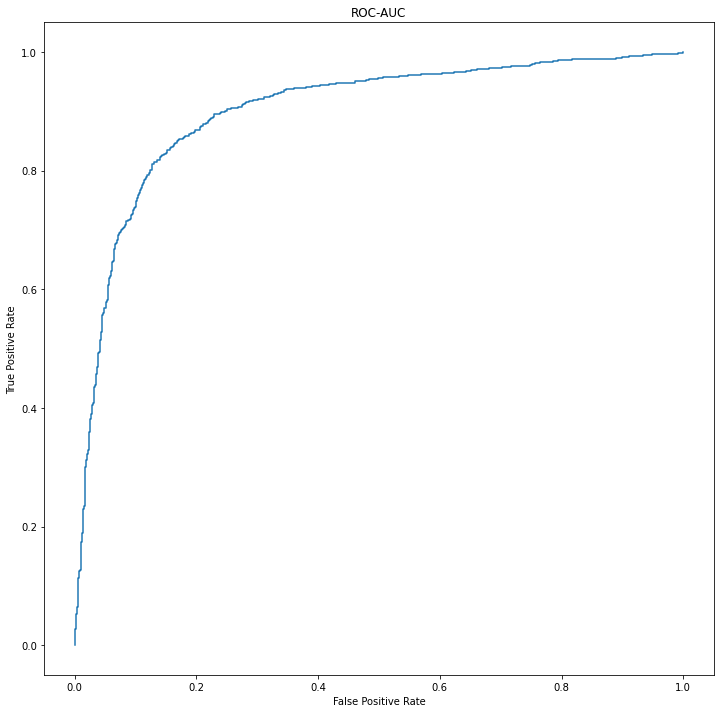

In [63]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Вычислим значение метрики ROC-AUC.

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds[:, 1])

0.9004754382176559

# Самостоятельный подсчет метрик TPR, FPR.

In [65]:
TP = 0
FP = 0 
TN = 0 
FN = 0 


for predict, actual in zip( preds[:, 1], y_test ):    
    if predict >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            TP += 1
        else:
            FP += 1
    
    else:
        if actual == 1:
            FN += 1
        else:
            TN += 1

In [66]:
TP, FP, TN, FN

(1055, 163, 882, 208)

In [67]:
TPR = TP/(TP+FN)
TPR

0.8353127474267616

In [68]:
FPR = FP/(FP+TN)
FPR

0.15598086124401914

# Самостоятельная реализация ROC-кривой и построение графика Precision-Recall.

In [69]:
tpr_means = []
fpr_means = []
precision_means = []
recall_means = []

for t in np.sort(preds[:, 0]):
    y_pred = preds[:, 1] >= t
    y_bool = y_test.astype(bool)
    
    tp = (y_pred & y_bool).sum()
    tn = (~y_pred & ~y_bool).sum()
    fp = (y_pred & ~y_bool).sum()
    fn = (~y_pred & y_bool).sum()
    
    tpr1 = tp / ( tp + fn )
    fpr1 = fp / ( fp + tn )
    prec = (tp/(tp+fp))
    rec = (tp/(tp+fn))
    
    fpr_means.append(fpr1)
    tpr_means.append(tpr1)
    precision_means.append(prec)
    recall_means.append(rec)
    
        

In [70]:
print(fpr_means[0:5])
print(tpr_means[0:5])
#убедилась, что работает

[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 0.9992082343626286, 0.9992082343626286, 0.9992082343626286]


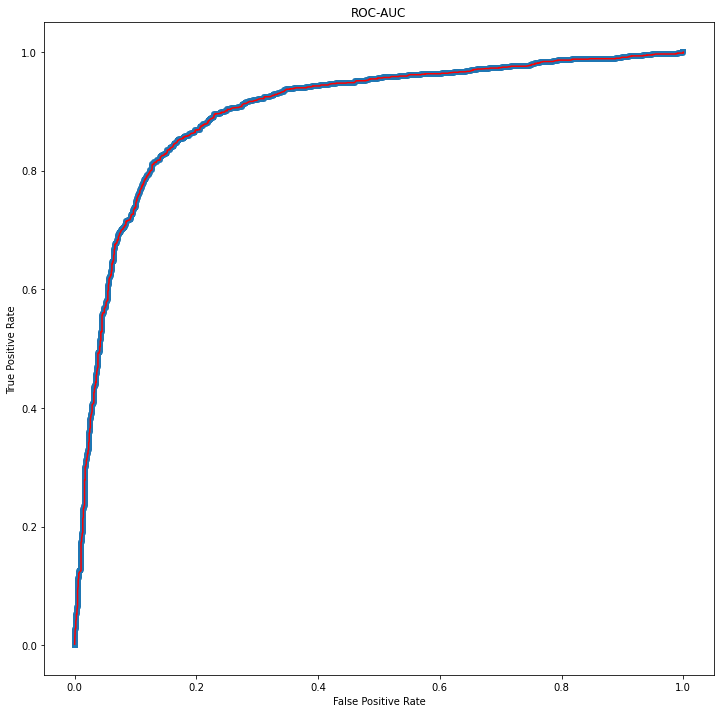

In [71]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, linewidth=6)
plt.plot(fpr_means, tpr_means, color = 'red')
plt.title('ROC-AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

График совпадает с графиком реализации sklearn.

Построим кривую Precision-Recall.

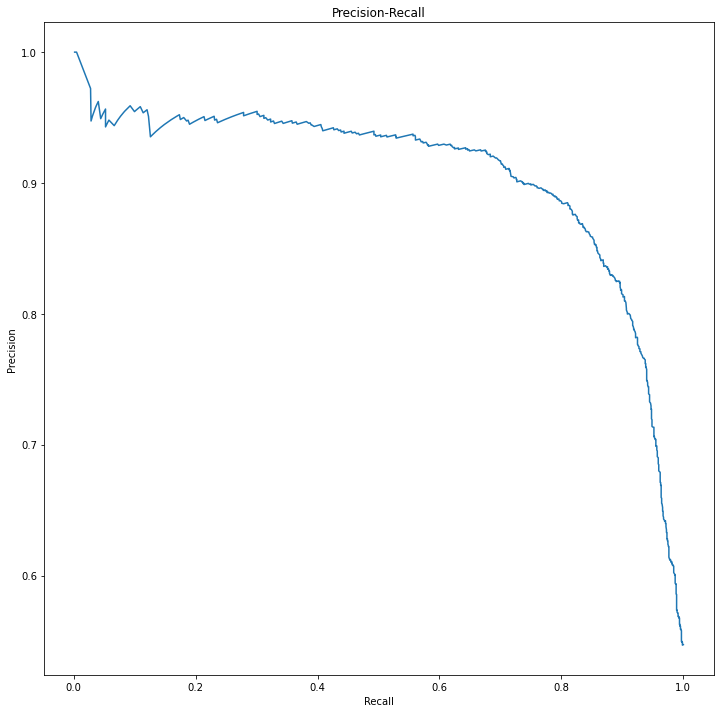

In [72]:
plt.figure(figsize=(12, 12))
plt.plot(recall_means, precision_means)
plt.title('Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Самостоятельный рассчет метрики ROC-AUC.

In [73]:
fpr_means.sort()
tpr_means.sort()

my_roc_auc = 0
fpr0 = 0
tpr0 = 0
for i in range(len(fpr_means)):
    if(i != 0):
        my_roc_auc += ((tpr_means[i] - tpr0) * (fpr_means[i] - fpr0) / 2) + (tpr_means[i] * (fpr_means[i] - fpr0))
        tpr0 = tpr_means[i]
        fpr0 = fpr_means[i]
print('Результат самостоятельной реализации метрики ROC-AUC:', round(my_roc_auc, 2))

Результат самостоятельной реализации метрики ROC-AUC: 0.9


# Выводы

В случае двух графиков мы понимаем, что чем больше пространства у нас остается под кривыми, тем точнее наша модель.

В случае, если ROC-кривая проходит ниже диагонали, то предполагаю, что обученная модель определила классы в основном с точностью наоборот.